In [1]:
import os 
import numpy as np
import nibabel as nib
import pandas as pd
import SimpleITK as sitk 
from radiomics import featureextractor, getFeatureClasses
import matplotlib.pyplot as plt
import csv
import seaborn as sns 
from scipy import stats
from sklearn.feature_selection import VarianceThreshold
import scipy.cluster.hierarchy as spc

In [2]:
nom_carpetes = [3077, 3078, 3079, 3121, 3329, 3536, 3542, 3543, 3544, 3076, 3148, 3157, 3164, 3171, 3265, 3288, 
                3289, 3457, 4972, 4979, 4980, 4996, 4998, 5007, 5009, 5013, 5014, 5018, 5021, 5042, 5056, 5057, 
                5063, 5064, 5065, 5066, 5086, 5087, 5097, 5102, 5104, 5113, 5114, 4970, 4971, 4978, 4985, 4986, 
                4987, 4993, 4994, 4997, 5008, 5019, 5020, 5032, 5033, 5034, 5041, 5058, 5098, 5103, 5105, 5378]

nom_carpetes_train = [3077, 3078, 3121, 3536, 3542, 3544, 4979, 4996, 4998, 5007, 5009, 5013, 5014, 5021, 5042, 
                      5056, 5057, 5063, 5064, 5065, 5066, 5086, 5087, 5097, 5102, 5104, 5113, 5114, 
                      3076, 3148, 3171, 3265, 3289, 3457, 4970, 4971, 4978, 4985, 4986, 4993, 4997, 5008, 
                      5020, 5032, 5033, 5034, 5041, 5058, 5098, 5103, 5105, 5378]
#There are 52: the first 28 CTRs, the last 24 Tg.            

nom_carpetes_test = [3079, 3329, 3543, 4972, 4980, 5018, 3157, 3164, 3288, 4987, 4994, 5019] 
#There are 12: the first 6 CTRs, the last 6 Tgs. 

path_ = "/Users/elisabetsorribes/Desktop/TFG/ALL DATASETS/"

nom_temps= ['t1', 't2', 't3', 't4', 't5']


## Feature selection. Exclusion of non-reproducible and irrelevant features

In [3]:
#From the code 1.Brain parcellation, label merging and feature extraction in Hippocampus.

counter_firstorder = 18
counter_shape = 14
counter_glcm = 24
counter_glrlm = 16
counter_glszm = 16
counter_gldm = 14
counter_ngtdm = 5
num_total_features = counter_firstorder + counter_shape + counter_glcm + counter_glrlm + counter_glszm + counter_gldm + counter_ngtdm
#107 features

nom_temps = ['t1', 't2', 't3', 't4', 't5']
num_temps = len(nom_temps)

num_casos_totals = len(nom_carpetes_train)*num_temps

fitxers_features = ['firstordertot.csv', 'shapetot.csv', 'glcmtot.csv', 'gldmtot.csv', 'glrlmtot.csv', 'glszmtot.csv', 'ngtdmtot.csv']
path_ = "/Users/elisabetsorribes/Desktop/TFG/ALL DATASETS"

matriu_variance = np.zeros((num_total_features, num_casos_totals)) 
#We want a matrix of 260, 107. However, we will transpose it later as it is easier to fill. Now 107, 260

In [4]:
def get_feature(i):
    switcher={
        0: 'original_firstorder_10Percentile',
        1: 'original_firstorder_90Percentile',
        2: 'original_firstorder_Energy',
        3: 'original_firstorder_Entropy', 
        4: 'original_firstorder_InterquartileRange',
        5: 'original_firstorder_Kurtosis',
        6: 'original_firstorder_Maximum',
        7: 'original_firstorder_MeanAbsoluteDeviation',
        8: 'original_firstorder_Mean',
        9: 'original_firstorder_Median',
        10: 'original_firstorder_Minimum',
        11: 'original_firstorder_Range',
        12: 'original_firstorder_RobustMeanAbsoluteDeviation',
        13: 'original_firstorder_RootMeanSquared',
        14: 'original_firstorder_Skewness',
        15: 'original_firstorder_TotalEnergy',
        16: 'original_firstorder_Uniformity',
        17: 'original_firstorder_Variance',
        18: 'original_shape_Elongation',
        19: 'original_shape_Flatness',
        20: 'original_shape_LeastAxisLength',
        21: 'original_shape_MajorAxisLength',
        22: 'original_shape_Maximum2DDiameterColumn',
        23: 'original_shape_Maximum2DDiameterRow',
        24: 'original_shape_Maximum2DDiameterSlice',
        25: 'original_shape_Maximum3DDiameter',
        26: 'original_shape_MeshVolume',
        27: 'original_shape_MinorAxisLength',
        28: 'original_shape_Sphericity',
        29: 'original_shape_SurfaceArea',
        30: 'original_shape_SurfaceVolumeRatio',
        31: 'original_shape_VoxelVolume',
        32: 'original_glcm_Autocorrelation',
        33: 'original_glcm_ClusterProminence',
        34: 'original_glcm_ClusterShade',
        35: 'original_glcm_ClusterTendency',
        36: 'original_glcm_Contrast',
        37: 'original_glcm_Correlation',
        38: 'original_glcm_DifferenceAverage',
        39: 'original_glcm_DifferenceEntropy', 
        40: 'original_glcm_DifferenceVariance',
        41: 'original_glcm_Id',
        42: 'original_glcm_Idm',
        43: 'original_glcm_Idmn',
        44: 'original_glcm_Idn',
        45: 'original_glcm_Imc1',
        46: 'original_glcm_Imc2',
        47: 'original_glcm_InverseVariance', 
        48: 'original_glcm_JointAverage',
        49: 'original_glcm_JointEnergy',
        50: 'original_glcm_JointEntropy',
        51: 'original_glcm_MCC', 
        52: 'original_glcm_MaximumProbability',
        53: 'original_glcm_SumAverage',
        54: 'original_glcm_SumEntropy',
        55: 'original_glcm_SumSquares',
        56: 'original_glrlm_GrayLevelNonUniformity',
        57: 'original_glrlm_GrayLevelNonUniformityNormalized',
        58: 'original_glrlm_GrayLevelVariance',
        59: 'original_glrlm_HighGrayLevelRunEmphasis',
        60: 'original_glrlm_LongRunEmphasis',
        61: 'original_glrlm_LongRunHighGrayLevelEmphasis', 
        62: 'original_glrlm_LongRunLowGrayLevelEmphasis',
        63: 'original_glrlm_LowGrayLevelRunEmphasis', 
        64: 'original_glrlm_RunEntropy',
        65: 'original_glrlm_RunLengthNonUniformity',
        66: 'original_glrlm_RunLengthNonUniformityNormalized',
        67: 'original_glrlm_RunPercentage',
        68: 'original_glrlm_RunVariance', 
        69: 'original_glrlm_ShortRunEmphasis',
        70: 'original_glrlm_ShortRunHighGrayLevelEmphasis',
        71: 'original_glrlm_ShortRunLowGrayLevelEmphasis',
        72: 'original_glszm_GrayLevelNonUniformity', 
        73: 'original_glszm_GrayLevelNonUniformityNormalized',
        74: 'original_glszm_GrayLevelVariance',
        75: 'original_glszm_HighGrayLevelZoneEmphasis', 
        76: 'original_glszm_LargeAreaEmphasis', 
        77: 'original_glszm_LargeAreaHighGrayLevelEmphasis', 
        78: 'original_glszm_LargeAreaLowGrayLevelEmphasis', 
        79: 'original_glszm_LowGrayLevelZoneEmphasis', 
        80: 'original_glszm_SizeZoneNonUniformity',
        81: 'original_glszm_SizeZoneNonUniformityNormalized', 
        82: 'original_glszm_SmallAreaEmphasis', 
        83: 'original_glszm_SmallAreaHighGrayLevelEmphasis',
        84: 'original_glszm_SmallAreaLowGrayLevelEmphasis', 
        85: 'original_glszm_ZoneEntropy',
        86: 'original_glszm_ZonePercentage', 
        87: 'original_glszm_ZoneVariance',
        88: 'original_gldm_DependenceEntropy',
        89: 'original_gldm_DependenceNonUniformity', 
        90: 'original_gldm_DependenceNonUniformityNormalized',
        91: 'original_gldm_DependenceVariance',
        92: 'original_gldm_GrayLevelNonUniformity',  
        93: 'original_gldm_GrayLevelVariance',
        94: 'original_gldm_HighGrayLevelEmphasis',
        95: 'original_gldm_LargeDependenceEmphasis',
        96: 'original_gldm_LargeDependenceHighGrayLevelEmphasis',
        97: 'original_gldm_LargeDependenceLowGrayLevelEmphasis',
        98: 'original_gldm_LowGrayLevelEmphasis',
        99: 'original_gldm_SmallDependenceEmphasis',
        100: 'original_gldm_SmallDependenceHighGrayLevelEmphasis',
        101: 'original_gldm_SmallDependenceLowGrayLevelEmphasis',
        102: 'original_ngtdm_Busyness',
        103: 'original_ngtdm_Coarseness', 
        104: 'original_ngtdm_Complexity',
        105: 'original_ngtdm_Contrast',
        106: 'original_ngtdm_Strength' 
    }
    return switcher.get(i)

In [5]:
path_ = "/Users/elisabetsorribes/Desktop/TFG/ALL DATASETS"

for num in range(num_total_features):
    
    vector_iterador = [] 
    variable = get_feature(num)
    
    if (num == 0) or (0 < num <= 17):
        fitxer = 'firstordertot.csv'
    elif (17 < num <= 31):
        fitxer = 'shapetot.csv'
    elif (31 < num <= 55):
        fitxer = 'glcmtot.csv'
    elif (55 < num <= 71):
        fitxer = 'glrlmtot.csv'
    elif (71 < num <= 87):
        fitxer = 'glszmtot.csv'
    elif (87 < num <= 101):
        fitxer = 'gldmtot.csv'
    else:
        fitxer = 'ngtdmtot.csv'
    
    for case in nom_carpetes_train:
            
        for temps in nom_temps:
            path_1 = str(case) + "/" + str(temps) + "/" + str(fitxer)
            data_path = os.path.join(path_,path_1)
            #print(data_path)
            
            if os.path.isfile(data_path): 
                with open(data_path) as Features: #Llegim el fitxer csv
                    reader = csv.DictReader(Features, delimiter=',', quotechar=',', quoting=csv.QUOTE_MINIMAL)
                
                    for row in reader: 
                        valor = row[variable]
                        valor = float(valor)
                        vector_iterador.append(valor)
            else:
                vector_iterador.append(np.nan)

    matriu_variance[num] = vector_iterador
    
    
matriu_variance_bo = np.transpose(matriu_variance)

with open('/Users/elisabetsorribes/Desktop/TFG/ALL DATASETS/matrizvariancedef.csv', 'w', newline='', encoding='utf-8') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerows(matriu_variance_bo)
    

In [6]:
#High variance
threshold_high = VarianceThreshold(threshold=0.8) 
matriu_high = threshold_high.fit_transform(matriu_variance_bo)
#print(matriu_high.shape) #(320,50) --> it has been lost 107-50 = 57 features. 

with open('/Users/elisabetsorribes/Desktop/TFG/ALL DATASETS/matrizvariancehigh.csv', 'w', newline='', encoding='utf-8') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerows(matriu_high)

#Low variance
threshold_low = VarianceThreshold(threshold=0.2)
matriu_low = threshold_low.fit_transform(matriu_variance_bo)
#print(matriu_low.shape) #(320,53) --> it has been lost 57-53 = 4 features. 

with open('/Users/elisabetsorribes/Desktop/TFG/ALL DATASETS/matrizvariancelow.csv', 'w', newline='', encoding='utf-8') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerows(matriu_low)

#Matriu with high+low variance
matriu_def = threshold_low.fit_transform(matriu_high)
print(matriu_def.shape[1])

with open('/Users/elisabetsorribes/Desktop/TFG/ALL DATASETS/matrizvariancedefinitiva.csv', 'w', newline='', encoding='utf-8') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerows(matriu_def) 

50


In [7]:
#We will remove features eliminated due to high variance. 

features_remaining = []
num_features_remaining = matriu_high.shape[1]

for i in range(num_features_remaining): #It must have the length of matriu high
    
    path_1 = "/Users/elisabetsorribes/Desktop/TFG/ALL DATASETS/3077/t1" #Here it is not necessary to check all the cases, just by looking at one we will know which features are missing.
    valor = matriu_high[0][i] #50 valors. 
    #print(valor)
    #print()
    
    for feat_fitxer in fitxers_features: #fitxers_features --> name of the file csv: firstordertot.csv...
        data_path = os.path.join(path_1,feat_fitxer)
        #print(data_path)
        
        with open(data_path) as Features: #We read the csv file
            reader = csv.reader(Features, delimiter=',', quotechar=',', quoting=csv.QUOTE_MINIMAL)
            
            contador = 0 
            
            for row in reader: 
                contador = contador + 1
                
                if (contador%2 == 0): #Here we will store the values of the features.
                    valors_features = tuple(row)
                    #print(valors_features)
                
                else: #Here we will store the name of the features. 
                    noms_features = tuple(row)
                    #print(noms_features)
                    
            for llarg in range(len(valors_features)):
                valor_2 = float(valors_features[llarg])
                #print(valor_2)
                        
                if (valor == valor_2):
                    features_remaining.append(noms_features[llarg])
                    
print(features_remaining) #50 features

['original_firstorder_10Percentile', 'original_firstorder_90Percentile', 'original_firstorder_Energy', 'original_firstorder_InterquartileRange', 'original_firstorder_Maximum', 'original_firstorder_MeanAbsoluteDeviation', 'original_firstorder_Mean', 'original_firstorder_Median', 'original_firstorder_Minimum', 'original_firstorder_Range', 'original_firstorder_RobustMeanAbsoluteDeviation', 'original_firstorder_RootMeanSquared', 'original_firstorder_TotalEnergy', 'original_firstorder_Variance', 'original_shape_MeshVolume', 'original_shape_SurfaceArea', 'original_shape_VoxelVolume', 'original_glcm_Autocorrelation', 'original_glcm_ClusterProminence', 'original_glcm_ClusterShade', 'original_glcm_ClusterTendency', 'original_glcm_Contrast', 'original_glcm_DifferenceAverage', 'original_glcm_DifferenceVariance', 'original_glcm_JointAverage', 'original_glcm_SumAverage', 'original_glcm_SumSquares', 'original_glrlm_GrayLevelNonUniformity', 'original_glrlm_GrayLevelVariance', 'original_glrlm_HighGray

In [8]:
#We will remove features eliminated due to low variance. 

features_remaining = []
num_features_remaining = matriu_low.shape[1]

for i in range(num_features_remaining): #It must have the length of matriu low
    
    path_1 = path_ = "/Users/elisabetsorribes/Desktop/TFG/ALL DATASETS/3077/t1" 
    valor = matriu_low[0][i]
    
    for feat_fitxer in fitxers_features:
        data_path = os.path.join(path_1,feat_fitxer)
        
        with open(data_path) as Features:
            reader = csv.reader(Features, delimiter=',', quotechar=',', quoting=csv.QUOTE_MINIMAL)
            
            contador = 0 
            
            for row in reader: 
                contador = contador + 1
                
                if (contador%2 == 0): 
                    valors_features = tuple(row)
                    #print(valors_features)
                
                else: 
                    noms_features = tuple(row)
                    #print(noms_features)
                    
            for llarg in range(len(valors_features)):
                valor_2 = float(valors_features[llarg])
                #print(valor_2)
                        
                if (valor == valor_2):
                    features_remaining.append(noms_features[llarg])        
                
print(features_remaining) #53 features

['original_firstorder_10Percentile', 'original_firstorder_90Percentile', 'original_firstorder_Energy', 'original_firstorder_InterquartileRange', 'original_firstorder_Maximum', 'original_firstorder_MeanAbsoluteDeviation', 'original_firstorder_Mean', 'original_firstorder_Median', 'original_firstorder_Minimum', 'original_firstorder_Range', 'original_firstorder_RobustMeanAbsoluteDeviation', 'original_firstorder_RootMeanSquared', 'original_firstorder_TotalEnergy', 'original_firstorder_Variance', 'original_shape_Maximum2DDiameterRow', 'original_shape_MeshVolume', 'original_shape_SurfaceArea', 'original_shape_VoxelVolume', 'original_glcm_Autocorrelation', 'original_glcm_ClusterProminence', 'original_glcm_ClusterShade', 'original_glcm_ClusterTendency', 'original_glcm_Contrast', 'original_glcm_DifferenceAverage', 'original_glcm_DifferenceVariance', 'original_glcm_JointAverage', 'original_glcm_JointEntropy', 'original_glcm_SumAverage', 'original_glcm_SumSquares', 'original_glrlm_GrayLevelNonUnif

In [9]:
features_remaining = []
num_features_remaining = matriu_def.shape[1]

for i in range(50): #Number of remaining features
    
    path_1 = path_ = "/Users/elisabetsorribes/Desktop/TFG/ALL DATASETS/3077/t1" 
    valor = matriu_def[0][i]
    
    for feat_fitxer in fitxers_features:
        data_path = os.path.join(path_1,feat_fitxer)
        
        with open(data_path) as Features:
            reader = csv.reader(Features, delimiter=',', quotechar=',', quoting=csv.QUOTE_MINIMAL)
            
            contador = 0 
            
            for row in reader: 
                contador = contador + 1
                
                if (contador%2 == 0): 
                    valors_features = tuple(row)
                    #print(valors_features)
                
                else: 
                    noms_features = tuple(row)
                    #print(noms_features)
                    
            for llarg in range(len(valors_features)):
                valor_2 = float(valors_features[llarg])
                #print(valor_2)
                        
                if (valor == valor_2):
                    features_remaining.append(noms_features[llarg])
                
    
print(features_remaining) 

['original_firstorder_10Percentile', 'original_firstorder_90Percentile', 'original_firstorder_Energy', 'original_firstorder_InterquartileRange', 'original_firstorder_Maximum', 'original_firstorder_MeanAbsoluteDeviation', 'original_firstorder_Mean', 'original_firstorder_Median', 'original_firstorder_Minimum', 'original_firstorder_Range', 'original_firstorder_RobustMeanAbsoluteDeviation', 'original_firstorder_RootMeanSquared', 'original_firstorder_TotalEnergy', 'original_firstorder_Variance', 'original_shape_MeshVolume', 'original_shape_SurfaceArea', 'original_shape_VoxelVolume', 'original_glcm_Autocorrelation', 'original_glcm_ClusterProminence', 'original_glcm_ClusterShade', 'original_glcm_ClusterTendency', 'original_glcm_Contrast', 'original_glcm_DifferenceAverage', 'original_glcm_DifferenceVariance', 'original_glcm_JointAverage', 'original_glcm_SumAverage', 'original_glcm_SumSquares', 'original_glrlm_GrayLevelNonUniformity', 'original_glrlm_GrayLevelVariance', 'original_glrlm_HighGray

## Feature selection. Evolution of radiomic features in heatmaps

In [10]:
num_casos = len(nom_carpetes_train) #52 cases

#Intensity (14)
matriu_original_firstorder_10Percentile = np.zeros((num_casos,num_temps))
matriu_original_firstorder_90Percentile = np.zeros((num_casos,num_temps))
matriu_original_firstorder_Energy = np.zeros((num_casos,num_temps))
matriu_original_firstorder_InterquartileRange = np.zeros((num_casos,num_temps))
matriu_original_firstorder_Maximum = np.zeros((num_casos,num_temps))
matriu_original_firstorder_MeanAbsoluteDeviation = np.zeros((num_casos,num_temps))
matriu_original_firstorder_Mean = np.zeros((num_casos,num_temps))
matriu_original_firstorder_Median = np.zeros((num_casos,num_temps))
matriu_original_firstorder_Minimum = np.zeros((num_casos,num_temps))
matriu_original_firstorder_Range = np.zeros((num_casos,num_temps))
matriu_original_firstorder_RobustMeanAbsoluteDeviation = np.zeros((num_casos,num_temps))
matriu_original_firstorder_RootMeanSquared = np.zeros((num_casos,num_temps))
matriu_original_firstorder_TotalEnergy = np.zeros((num_casos,num_temps))
matriu_original_firstorder_Variance = np.zeros((num_casos,num_temps))


#Shape (3)
matriu_original_shape_MeshVolume = np.zeros((num_casos,num_temps))
matriu_original_shape_SurfaceArea = np.zeros((num_casos,num_temps))
matriu_original_shape_VoxelVolume = np.zeros((num_casos,num_temps))

#GLCM (10)
matriu_original_glcm_Autocorrelation = np.zeros((num_casos,num_temps))
matriu_original_glcm_ClusterProminence = np.zeros((num_casos,num_temps))
matriu_original_glcm_ClusterShade = np.zeros((num_casos,num_temps))
matriu_original_glcm_ClusterTendency = np.zeros((num_casos,num_temps))
matriu_original_glcm_Contrast = np.zeros((num_casos,num_temps))
matriu_original_glcm_DifferenceAverage = np.zeros((num_casos,num_temps))
matriu_original_glcm_DifferenceVariance = np.zeros((num_casos,num_temps))
matriu_original_glcm_JointAverage = np.zeros((num_casos,num_temps))
matriu_original_glcm_SumAverage = np.zeros((num_casos,num_temps))
matriu_original_glcm_SumSquares = np.zeros((num_casos,num_temps))

#GLRLM (6)
matriu_original_glrlm_GrayLevelNonUniformity = np.zeros((num_casos,num_temps))
matriu_original_glrlm_GrayLevelVariance = np.zeros((num_casos,num_temps))
matriu_original_glrlm_HighGrayLevelRunEmphasis = np.zeros((num_casos,num_temps))
matriu_original_glrlm_LongRunHighGrayLevelEmphasis = np.zeros((num_casos,num_temps))
#matriu_original_glrlm_RunEntropy = np.zeros((num_casos,num_temps))
matriu_original_glrlm_RunLengthNonUniformity = np.zeros((num_casos,num_temps))
matriu_original_glrlm_ShortRunHighGrayLevelEmphasis = np.zeros((num_casos,num_temps))

#GLSZM (8)
matriu_original_glszm_GrayLevelNonUniformity = np.zeros((num_casos,num_temps))
matriu_original_glszm_GrayLevelVariance = np.zeros((num_casos,num_temps))
matriu_original_glszm_HighGrayLevelZoneEmphasis = np.zeros((num_casos,num_temps))
matriu_original_glszm_LargeAreaEmphasis = np.zeros((num_casos,num_temps))
matriu_original_glszm_LargeAreaHighGrayLevelEmphasis = np.zeros((num_casos,num_temps))
matriu_original_glszm_SizeZoneNonUniformity = np.zeros((num_casos,num_temps))
#matriu_original_glszm_SmallAreaEmphasis = np.zeros((num_casos,num_temps))
matriu_original_glszm_SmallAreaHighGrayLevelEmphasis = np.zeros((num_casos,num_temps))
matriu_original_glszm_ZoneVariance = np.zeros((num_casos,num_temps))

#GLDM (7)
matriu_original_gldm_DependenceNonUniformity = np.zeros((num_casos,num_temps))
matriu_original_gldm_GrayLevelNonUniformity = np.zeros((num_casos,num_temps))
matriu_original_gldm_GrayLevelVariance = np.zeros((num_casos,num_temps))
matriu_original_gldm_HighGrayLevelEmphasis = np.zeros((num_casos,num_temps))
matriu_original_gldm_LargeDependenceEmphasis = np.zeros((num_casos,num_temps))
matriu_original_gldm_LargeDependenceHighGrayLevelEmphasis = np.zeros((num_casos,num_temps))
matriu_original_gldm_SmallDependenceHighGrayLevelEmphasis = np.zeros((num_casos,num_temps))

#NGTDM (2)
matriu_original_ngtdm_Complexity = np.zeros((num_casos,num_temps))
matriu_original_ngtdm_Strength = np.zeros((num_casos,num_temps))

In [11]:
path_ = "/Users/elisabetsorribes/Desktop/TFG/ALL DATASETS/"

for i in range(len(nom_carpetes_train)): #We will iterate all the 52 cases. 
    case = nom_carpetes_train[i]
    
    for feat in features_remaining: #In each case, we will iterate 50 times = number of remaining features.
        #print(feat)
        iterador = []
        
        if 'original_firstorder_' in feat:
            fitxer = 'firstordertot.csv'
        elif 'original_shape_' in feat:
            fitxer = 'shapetot.csv'
        elif 'original_glcm_' in feat:
            fitxer = 'glcmtot.csv'
        elif 'original_glrlm_' in feat:
            fitxer = 'glrlmtot.csv'
        elif 'original_glszm_' in feat:
            fitxer = 'glszmtot.csv'
        elif 'original_gldm_' in feat:
            fitxer = 'gldmtot.csv'
        else:
            fitxer = 'ngtdmtot.csv'
    
        for temps in nom_temps: #Each feature will have to be iterated 5 times because there are 5 time evaluations.
            path_1 = str(case) + "/" + str(temps) + "/" + str(fitxer)
            data_path = os.path.join(path_,path_1)
            #print(data_path)
            
            if os.path.isfile(data_path):
                with open(data_path) as Features: 
                    reader = csv.DictReader(Features, delimiter=',', quotechar=',', quoting=csv.QUOTE_MINIMAL)
                
                    for row in reader: 
                        valor = row[feat]
                        #print(valor)
                        iterador.append(valor)
            else:
                iterador.append(np.NaN) #If it does not exist the time evaluation, it will be added a NaN.
    
                
            if (len(iterador) == 5) and (feat == 'original_firstorder_10Percentile'):  #1      
                matriu_original_firstorder_10Percentile[i] = iterador
            
            elif (len(iterador) == 5) and (feat == 'original_firstorder_90Percentile'): #2
                matriu_original_firstorder_90Percentile[i] = iterador
                
            elif (len(iterador) == 5) and (feat == 'original_firstorder_Energy'): #3
                matriu_original_firstorder_Energy[i] = iterador
                
            elif (len(iterador) == 5) and (feat == 'original_firstorder_InterquartileRange'): #4
                matriu_original_firstorder_InterquartileRange[i] = iterador
            
            elif (len(iterador) == 5) and (feat == 'original_firstorder_Maximum'): #5
                matriu_original_firstorder_Maximum[i] = iterador
                
            elif (len(iterador) == 5) and (feat == 'original_firstorder_MeanAbsoluteDeviation'): #6
                matriu_original_firstorder_MeanAbsoluteDeviation[i] = iterador
            
            elif (len(iterador) == 5) and (feat == 'original_firstorder_Mean'): #7
                matriu_original_firstorder_Mean[i] = iterador
            
            elif (len(iterador) == 5) and (feat == 'original_firstorder_Median'): #8
                matriu_original_firstorder_Median[i] = iterador
            
            elif (len(iterador) == 5) and (feat == 'original_firstorder_Minimum'): #9
                matriu_original_firstorder_Minimum[i] = iterador
            
            elif (len(iterador) == 5) and (feat == 'original_firstorder_Range'): #10
                matriu_original_firstorder_Range[i] = iterador
            
            elif (len(iterador) == 5) and (feat == 'original_firstorder_RobustMeanAbsoluteDeviation'): #11
                matriu_original_firstorder_RobustMeanAbsoluteDeviation[i] = iterador
            
            elif (len(iterador) == 5) and (feat == 'original_firstorder_RootMeanSquared'): #12
                matriu_original_firstorder_RootMeanSquared[i] = iterador
            
            elif (len(iterador) == 5) and (feat == 'original_firstorder_TotalEnergy'): #13
                matriu_original_firstorder_TotalEnergy[i] = iterador
                
            elif (len(iterador) == 5) and (feat == 'original_firstorder_Variance'): #14
                matriu_original_firstorder_Variance[i] = iterador
            
            elif (len(iterador) == 5) and (feat == 'original_shape_MeshVolume'): #15
                matriu_original_shape_MeshVolume[i] = iterador
            
            elif (len(iterador) == 5) and (feat == 'original_shape_SurfaceArea'): #16
                matriu_original_shape_SurfaceArea[i] = iterador
            
            elif (len(iterador) == 5) and (feat == 'original_shape_VoxelVolume'): #17
                matriu_original_shape_VoxelVolume[i] = iterador
            
            elif (len(iterador) == 5) and (feat == 'original_glcm_Autocorrelation'): #18       
                matriu_original_glcm_Autocorrelation[i] = iterador
            
            elif (len(iterador) == 5) and (feat == 'original_glcm_ClusterProminence'): #19
                matriu_original_glcm_ClusterProminence[i] = iterador
                
            elif (len(iterador) == 5) and (feat == 'original_glcm_ClusterShade'): #20
                matriu_original_glcm_ClusterShade[i] = iterador
                
            elif (len(iterador) == 5) and (feat == 'original_glcm_ClusterTendency'): #21
                matriu_original_glcm_ClusterTendency[i] = iterador
                
            elif (len(iterador) == 5) and (feat == 'original_glcm_Contrast'): #22
                matriu_original_glcm_Contrast[i] = iterador
            
            elif (len(iterador) == 5) and (feat == 'original_glcm_DifferenceAverage'): #23
                matriu_original_glcm_DifferenceAverage[i] = iterador
            
            elif (len(iterador) == 5) and (feat == 'original_glcm_DifferenceVariance'): #24
                matriu_original_glcm_DifferenceVariance[i] = iterador
            
            elif (len(iterador) == 5) and (feat == 'original_glcm_JointAverage'): #25
                matriu_original_glcm_JointAverage[i] = iterador
            
            elif (len(iterador) == 5) and (feat == 'original_glcm_SumAverage'): #26
                matriu_original_glcm_SumAverage[i] = iterador
            
            elif (len(iterador) == 5) and (feat == 'original_glcm_SumSquares'): #27
                matriu_original_glcm_SumSquares[i] = iterador
                          
            elif (len(iterador) == 5) and (feat == 'original_glrlm_GrayLevelNonUniformity'): #28       
                matriu_original_glrlm_GrayLevelNonUniformity[i] = iterador
                
            elif (len(iterador) == 5) and (feat == 'original_glrlm_GrayLevelVariance'): #29
                matriu_original_glrlm_GrayLevelVariance[i] = iterador
                
            elif (len(iterador) == 5) and (feat == 'original_glrlm_HighGrayLevelRunEmphasis'): #30
                matriu_original_glrlm_HighGrayLevelRunEmphasis[i] = iterador
                            
            elif (len(iterador) == 5) and (feat == 'original_glrlm_LongRunHighGrayLevelEmphasis'): #31
                matriu_original_glrlm_LongRunHighGrayLevelEmphasis[i] = iterador
            
            elif (len(iterador) == 5) and (feat == 'original_glrlm_RunLengthNonUniformity'): #32
                matriu_original_glrlm_RunLengthNonUniformity[i] = iterador
            
            elif (len(iterador) == 5) and (feat == 'original_glrlm_ShortRunHighGrayLevelEmphasis'): #33
                matriu_original_glrlm_ShortRunHighGrayLevelEmphasis[i] = iterador
            
            elif (len(iterador) == 5) and (feat == 'original_glszm_GrayLevelNonUniformity'):  #34      
                matriu_original_glszm_GrayLevelNonUniformity[i] = iterador
                
            elif (len(iterador) == 5) and (feat == 'original_glszm_GrayLevelVariance'): #35
                matriu_original_glszm_GrayLevelVariance[i] = iterador
                
            elif (len(iterador) == 5) and (feat == 'original_glszm_HighGrayLevelZoneEmphasis'): #36
                matriu_original_glszm_HighGrayLevelZoneEmphasis[i] = iterador
                
            elif (len(iterador) == 5) and (feat == 'original_glszm_LargeAreaEmphasis'): #37
                matriu_original_glszm_LargeAreaEmphasis[i] = iterador
                            
            elif (len(iterador) == 5) and (feat == 'original_glszm_LargeAreaHighGrayLevelEmphasis'): #38
                matriu_original_glszm_LargeAreaHighGrayLevelEmphasis[i] = iterador
            
            elif (len(iterador) == 5) and (feat == 'original_glszm_SizeZoneNonUniformity'): #39
                matriu_original_glszm_SizeZoneNonUniformity[i] = iterador
            
            elif (len(iterador) == 5) and (feat == 'original_glszm_SmallAreaHighGrayLevelEmphasis'): #40
                matriu_original_glszm_SmallAreaHighGrayLevelEmphasis[i] = iterador
            
            elif (len(iterador) == 5) and (feat == 'original_glszm_ZoneVariance'): #41
                matriu_original_glszm_ZoneVariance[i] = iterador
            
            elif (len(iterador) == 5) and (feat == 'original_gldm_DependenceNonUniformity'): #42
                matriu_original_gldm_DependenceNonUniformity[i] = iterador
                
            elif (len(iterador) == 5) and (feat == 'original_gldm_GrayLevelNonUniformity'): #43
                matriu_original_gldm_GrayLevelNonUniformity[i] = iterador
                            
            elif (len(iterador) == 5) and (feat == 'original_gldm_GrayLevelVariance'): #44
                matriu_original_gldm_GrayLevelVariance[i] = iterador
            
            elif (len(iterador) == 5) and (feat == 'original_gldm_HighGrayLevelEmphasis'): #45
                matriu_original_gldm_HighGrayLevelEmphasis[i] = iterador
                
            elif (len(iterador) == 5) and (feat == 'original_gldm_LargeDependenceEmphasis'): #46
                matriu_original_gldm_LargeDependenceEmphasis[i] = iterador
            
            elif (len(iterador) == 5) and (feat == 'original_gldm_LargeDependenceHighGrayLevelEmphasis'): #47
                matriu_original_gldm_LargeDependenceHighGrayLevelEmphasis[i] = iterador
            
            elif (len(iterador) == 5) and (feat == 'original_gldm_SmallDependenceHighGrayLevelEmphasis'): #48
                matriu_original_gldm_SmallDependenceHighGrayLevelEmphasis[i] = iterador
                
            elif (len(iterador) == 5) and (feat == 'original_ngtdm_Complexity'): #49
                matriu_original_ngtdm_Complexity[i] = iterador

            elif (len(iterador) == 5) and (feat == 'original_ngtdm_Strength'): #50
                matriu_original_ngtdm_Strength[i] = iterador

In [12]:
#Here below, we create a matrix for each feature in order to calculate the z-score. 

#Intensity
zmatriu_original_firstorder_10Percentile = stats.zscore(matriu_original_firstorder_10Percentile, nan_policy='omit')
zmatriu_original_firstorder_90Percentile = stats.zscore(matriu_original_firstorder_90Percentile, nan_policy='omit')
zmatriu_original_firstorder_Energy = stats.zscore(matriu_original_firstorder_Energy, nan_policy='omit')
zmatriu_original_firstorder_InterquartileRange = stats.zscore(matriu_original_firstorder_InterquartileRange, nan_policy='omit')
zmatriu_original_firstorder_Maximum = stats.zscore(matriu_original_firstorder_Maximum, nan_policy='omit')
zmatriu_original_firstorder_MeanAbsoluteDeviation = stats.zscore(matriu_original_firstorder_MeanAbsoluteDeviation, nan_policy='omit')
zmatriu_original_firstorder_Mean = stats.zscore(matriu_original_firstorder_Mean, nan_policy='omit')
zmatriu_original_firstorder_Median = stats.zscore(matriu_original_firstorder_Median, nan_policy='omit')
zmatriu_original_firstorder_Minimum = stats.zscore(matriu_original_firstorder_Minimum, nan_policy='omit')
zmatriu_original_firstorder_Range = stats.zscore(matriu_original_firstorder_Range, nan_policy='omit')
zmatriu_original_firstorder_RobustMeanAbsoluteDeviation = stats.zscore(matriu_original_firstorder_RobustMeanAbsoluteDeviation, nan_policy='omit')
zmatriu_original_firstorder_RootMeanSquared = stats.zscore(matriu_original_firstorder_RootMeanSquared, nan_policy='omit')
zmatriu_original_firstorder_TotalEnergy = stats.zscore(matriu_original_firstorder_TotalEnergy, nan_policy='omit')
zmatriu_original_firstorder_Variance = stats.zscore(matriu_original_firstorder_Variance, nan_policy='omit')

#Shape
zmatriu_original_shape_MeshVolume = stats.zscore(matriu_original_shape_MeshVolume, nan_policy='omit')
zmatriu_original_shape_SurfaceArea = stats.zscore(matriu_original_shape_SurfaceArea, nan_policy='omit')
zmatriu_original_shape_VoxelVolume = stats.zscore(matriu_original_shape_VoxelVolume, nan_policy='omit')

#GLCM
zmatriu_original_glcm_Autocorrelation = stats.zscore(matriu_original_glcm_Autocorrelation, nan_policy='omit')
zmatriu_original_glcm_ClusterProminence = stats.zscore(matriu_original_glcm_ClusterProminence, nan_policy='omit')
zmatriu_original_glcm_ClusterShade = stats.zscore(matriu_original_glcm_ClusterShade, nan_policy='omit')
zmatriu_original_glcm_ClusterTendency = stats.zscore(matriu_original_glcm_ClusterTendency, nan_policy='omit')
zmatriu_original_glcm_Contrast = stats.zscore(matriu_original_glcm_Contrast, nan_policy='omit')
zmatriu_original_glcm_DifferenceAverage = stats.zscore(matriu_original_glcm_DifferenceAverage, nan_policy='omit')
zmatriu_original_glcm_DifferenceVariance = stats.zscore(matriu_original_glcm_DifferenceVariance, nan_policy='omit')
zmatriu_original_glcm_JointAverage = stats.zscore(matriu_original_glcm_JointAverage, nan_policy='omit')
zmatriu_original_glcm_SumAverage = stats.zscore(matriu_original_glcm_SumAverage, nan_policy='omit')
zmatriu_original_glcm_SumSquares = stats.zscore(matriu_original_glcm_SumSquares, nan_policy='omit')

#GLRLM
zmatriu_original_glrlm_GrayLevelNonUniformity = stats.zscore(matriu_original_glrlm_GrayLevelNonUniformity, nan_policy='omit')
zmatriu_original_glrlm_GrayLevelVariance = stats.zscore(matriu_original_glrlm_GrayLevelVariance, nan_policy='omit')
zmatriu_original_glrlm_HighGrayLevelRunEmphasis = stats.zscore(matriu_original_glrlm_HighGrayLevelRunEmphasis, nan_policy='omit')
zmatriu_original_glrlm_LongRunHighGrayLevelEmphasis = stats.zscore(matriu_original_glrlm_LongRunHighGrayLevelEmphasis, nan_policy='omit')
zmatriu_original_glrlm_RunLengthNonUniformity = stats.zscore(matriu_original_glrlm_RunLengthNonUniformity, nan_policy='omit')
zmatriu_original_glrlm_ShortRunHighGrayLevelEmphasis = stats.zscore(matriu_original_glrlm_ShortRunHighGrayLevelEmphasis, nan_policy='omit')


#GLSZM
zmatriu_original_glszm_GrayLevelNonUniformity = stats.zscore(matriu_original_glszm_GrayLevelNonUniformity, nan_policy='omit')
zmatriu_original_glszm_GrayLevelVariance = stats.zscore(matriu_original_glszm_GrayLevelVariance, nan_policy='omit')
zmatriu_original_glszm_HighGrayLevelZoneEmphasis = stats.zscore(matriu_original_glszm_HighGrayLevelZoneEmphasis, nan_policy='omit')
zmatriu_original_glszm_LargeAreaEmphasis = stats.zscore(matriu_original_glszm_LargeAreaEmphasis, nan_policy='omit')
zmatriu_original_glszm_LargeAreaHighGrayLevelEmphasis = stats.zscore(matriu_original_glszm_LargeAreaHighGrayLevelEmphasis, nan_policy='omit')
zmatriu_original_glszm_SizeZoneNonUniformity = stats.zscore(matriu_original_glszm_SizeZoneNonUniformity, nan_policy='omit')
zmatriu_original_glszm_SmallAreaHighGrayLevelEmphasis = stats.zscore(matriu_original_glszm_SmallAreaHighGrayLevelEmphasis, nan_policy='omit')
zmatriu_original_glszm_ZoneVariance = stats.zscore(matriu_original_glszm_ZoneVariance, nan_policy='omit')

#GLDM
zmatriu_original_gldm_DependenceNonUniformity = stats.zscore(matriu_original_gldm_DependenceNonUniformity, nan_policy='omit')
zmatriu_original_gldm_GrayLevelNonUniformity = stats.zscore(matriu_original_gldm_GrayLevelNonUniformity, nan_policy='omit')
zmatriu_original_gldm_GrayLevelVariance = stats.zscore(matriu_original_gldm_GrayLevelVariance, nan_policy='omit')
zmatriu_original_gldm_HighGrayLevelEmphasis = stats.zscore(matriu_original_gldm_HighGrayLevelEmphasis, nan_policy='omit')
zmatriu_original_gldm_LargeDependenceEmphasis = stats.zscore(matriu_original_gldm_LargeDependenceEmphasis, nan_policy='omit')
zmatriu_original_gldm_LargeDependenceHighGrayLevelEmphasis = stats.zscore(matriu_original_gldm_LargeDependenceHighGrayLevelEmphasis, nan_policy='omit')
zmatriu_original_gldm_SmallDependenceHighGrayLevelEmphasis = stats.zscore(matriu_original_gldm_SmallDependenceHighGrayLevelEmphasis, nan_policy='omit')

#NGTDM
zmatriu_original_ngtdm_Complexity = stats.zscore(matriu_original_ngtdm_Complexity, nan_policy='omit')
zmatriu_original_ngtdm_Strength = stats.zscore(matriu_original_ngtdm_Strength, nan_policy='omit')

In [13]:
def get_feature_remaining(i):
    switcher={
        0: zmatriu_original_firstorder_10Percentile,
        1: zmatriu_original_firstorder_90Percentile,
        2: zmatriu_original_firstorder_Energy,
        3: zmatriu_original_firstorder_InterquartileRange,
        4: zmatriu_original_firstorder_Maximum,
        5: zmatriu_original_firstorder_MeanAbsoluteDeviation,
        6: zmatriu_original_firstorder_Mean,
        7: zmatriu_original_firstorder_Median,
        8: zmatriu_original_firstorder_Minimum,
        9: zmatriu_original_firstorder_Range,
        10: zmatriu_original_firstorder_RobustMeanAbsoluteDeviation,
        11: zmatriu_original_firstorder_RootMeanSquared,
        12: zmatriu_original_firstorder_TotalEnergy,
        13: zmatriu_original_firstorder_Variance,
        14: zmatriu_original_shape_MeshVolume,
        15: zmatriu_original_shape_SurfaceArea,
        16: zmatriu_original_shape_VoxelVolume,
        17: zmatriu_original_glcm_Autocorrelation,
        18: zmatriu_original_glcm_ClusterProminence,
        19: zmatriu_original_glcm_ClusterShade,
        20: zmatriu_original_glcm_ClusterTendency,
        21: zmatriu_original_glcm_Contrast,
        22: zmatriu_original_glcm_DifferenceAverage,
        23: zmatriu_original_glcm_DifferenceVariance,
        24: zmatriu_original_glcm_JointAverage,
        25: zmatriu_original_glcm_SumAverage,
        26: zmatriu_original_glcm_SumSquares,
        27: zmatriu_original_glrlm_GrayLevelNonUniformity,
        28: zmatriu_original_glrlm_GrayLevelVariance,
        29: zmatriu_original_glrlm_HighGrayLevelRunEmphasis,
        30: zmatriu_original_glrlm_LongRunHighGrayLevelEmphasis, 
        31: zmatriu_original_glrlm_RunLengthNonUniformity,
        32: zmatriu_original_glrlm_ShortRunHighGrayLevelEmphasis,
        33: zmatriu_original_glszm_GrayLevelNonUniformity, 
        34: zmatriu_original_glszm_GrayLevelVariance,
        35: zmatriu_original_glszm_HighGrayLevelZoneEmphasis, 
        36: zmatriu_original_glszm_LargeAreaEmphasis, 
        37: zmatriu_original_glszm_LargeAreaHighGrayLevelEmphasis, 
        38: zmatriu_original_glszm_SizeZoneNonUniformity,
        39: zmatriu_original_glszm_SmallAreaHighGrayLevelEmphasis,
        40: zmatriu_original_glszm_ZoneVariance,
        41: zmatriu_original_gldm_DependenceNonUniformity,
        42: zmatriu_original_gldm_GrayLevelNonUniformity,  
        43: zmatriu_original_gldm_GrayLevelVariance,
        44: zmatriu_original_gldm_HighGrayLevelEmphasis,
        45: zmatriu_original_gldm_LargeDependenceEmphasis,
        46: zmatriu_original_gldm_LargeDependenceHighGrayLevelEmphasis,
        47: zmatriu_original_gldm_SmallDependenceHighGrayLevelEmphasis,
        48: zmatriu_original_ngtdm_Complexity,
        49: zmatriu_original_ngtdm_Strength 
    }
    return switcher.get(i)

In [14]:
num_features_remaining = len(features_remaining) #50
num_avaluacions = len(nom_carpetes_train)*num_temps
num_CTR = 28
num_AD = 24

#We will create a matrix for each rat group and then we will concatenate them in order to create the heatmap. 
num_avaluacions_CTR = num_CTR*num_temps #140
num_avaluacions_AD = num_AD*num_temps #120

zmatriu_heatmap_CTR = np.zeros((num_features_remaining,num_avaluacions_CTR))
zmatriu_heatmap_AD = np.zeros((num_features_remaining,num_avaluacions_AD))

for i in range(num_features_remaining): 
    
    matriu = get_feature_remaining(i)
    iterador = []
        
    for temps in range(num_temps):
        columna = [fila[temps] for fila in matriu] #Len 52:  t1, t2, t3, t4, t5
        
        for aval in range(num_CTR): #0, 27
            valor = columna[aval]
            iterador.append(valor)
            
    zmatriu_heatmap_CTR[i] = iterador

for i in range(num_features_remaining): 
    
    matriu = get_feature_remaining(i)
    iterador = []
        
    for temps in range(num_temps):
        columna = [fila[temps] for fila in matriu] #Len 52:  t1, t2, t3, t4, t5
        
        for aval in range(28, len(nom_carpetes_train)): #28, 51
            valor = columna[aval]
            iterador.append(valor)
            
    zmatriu_heatmap_AD[i] = iterador
        
zmatriu_heatmap_CTR = np.array(zmatriu_heatmap_CTR) #(50,140)
zmatriu_heatmap_AD = np.array(zmatriu_heatmap_AD) #(50,120)

zmatriu_heatmap = np.concatenate((zmatriu_heatmap_CTR, zmatriu_heatmap_AD), axis = 1)
#print(zmatriu_heatmap.shape)   

zmatriu_heatmap = np.nan_to_num(zmatriu_heatmap)
zmatriu_heatmap = np.transpose(zmatriu_heatmap)

In [15]:
#Guardarem els valors de la matriu en un fitxer csv

nom_csv = 'matriu_heatmap_def_featureselection.csv'
nom_csv_corr = 'matriu_heatmap_def_corr_featureselection.csv'
titol = 'Z-score heatmap of CTR and TG in hippocampus'
png = 'def_heatmap_featureselection_CTRTGunihip.png'
titol_corr = 'Correlation between features in AD and Control'
png_corr = 'def_correlation_featureselection.png'

path_ = '/Users/elisabetsorribes/Desktop/TFG/ALL DATASETS'
data_path = data_path = os.path.join(path_,nom_csv)

with open(data_path, 'w', newline='', encoding='utf-8') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerows(zmatriu_heatmap)

In [16]:
casos = [ '3077 t1', '3078 t1', '3121 t1', '3536 t1', '3542 t1', '3544 t1', '4979 t1', '4996 t1', '4998 t1', 
          '5007 t1', '5009 t1', '5013 t1', '5014 t1', '5021 t1', '5042 t1', '5056 t1', '5057 t1', '5063 t1', 
          '5064 t1', '5065 t1', '5066 t1', '5086 t1', '5087 t1', '5097 t1', '5102 t1', '5104 t1', '5113 t1', 
          '5114 t1', '3077 t2', '3078 t2', '3121 t2', '3536 t2', '3542 t2', '3544 t2', '4979 t2', '4996 t2', 
          '4998 t2', '5007 t2', '5009 t2', '5013 t2', '5014 t2', '5021 t2', '5042 t2', '5056 t2', '5057 t2', 
          '5063 t2', '5064 t2', '5065 t2', '5066 t2', '5086 t2', '5087 t2', '5097 t2', '5102 t2', '5104 t2', 
          '5113 t2', '5114 t2', '3077 t3', '3078 t3', '3121 t3', '3536 t3', '3542 t3', '3544 t3', '4979 t3', 
          '4996 t3', '4998 t3', '5007 t3', '5009 t3', '5013 t3', '5014 t3', '5021 t3', '5042 t3', '5056 t3', 
          '5057 t3', '5063 t3', '5064 t3', '5065 t3', '5066 t3', '5086 t3', '5087 t3', '5097 t3', '5102 t3', 
          '5104 t3', '5113 t3', '5114 t3', '3077 t4', '3078 t4', '3121 t4', '3536 t4', '3542 t4', '3544 t4', 
          '4979 t4', '4996 t4', '4998 t4', '5007 t4', '5009 t4', '5013 t4', '5014 t4', '5021 t4', '5042 t4', 
          '5056 t4', '5057 t4', '5063 t4', '5064 t4', '5065 t4', '5066 t4', '5086 t4', '5087 t4', '5097 t4', 
          '5102 t4', '5104 t4', '5113 t4', '5114 t4', '3077 t5', '3078 t5', '3121 t5', '3536 t5', '3542 t5', 
          '3544 t5', '4979 t5', '4996 t5', '4998 t5', '5007 t5', '5009 t5', '5013 t5', '5014 t5', '5021 t5', 
          '5042 t5', '5056 t5', '5057 t5', '5063 t5', '5064 t5', '5065 t5', '5066 t5', '5086 t5', '5087 t5', 
          '5097 t5', '5102 t5', '5104 t5', '5113 t5', '5114 t5', #CTR
          '3076 t1', '3148 t1', '3171 t1', '3265 t1', '3289 t1', '3457 t1', '4970 t1', '4971 t1', 
          '4978 t1', '4985 t1', '4986 t1', '4993 t1', '4997 t1', '5008 t1', '5020 t1', '5032 t1', 
          '5033 t1', '5034 t1', '5041 t1', '5058 t1', '5098 t1', '5103 t1', '5105 t1', '5378 t1',
          '3076 t2', '3148 t2', '3171 t2', '3265 t2', '3289 t2', '3457 t2', '4970 t2', '4971 t2', 
          '4978 t2', '4985 t2', '4986 t2', '4993 t2', '4997 t2', '5008 t2', '5020 t2', '5032 t2', 
          '5033 t2', '5034 t2', '5041 t2', '5058 t2', '5098 t2', '5103 t2', '5105 t2', '5378 t2',
          '3076 t3', '3148 t3', '3171 t3', '3265 t3', '3289 t3', '3457 t3', '4970 t3', '4971 t3', 
          '4978 t3', '4985 t3', '4986 t3', '4993 t3', '4997 t3', '5008 t3', '5020 t3', '5032 t3', 
          '5033 t3', '5034 t3', '5041 t3', '5058 t3', '5098 t3', '5103 t3', '5105 t3', '5378 t3',
          '3076 t4', '3148 t4', '3171 t4', '3265 t4', '3289 t4', '3457 t4', '4970 t4', '4971 t4', 
          '4978 t4', '4985 t4', '4986 t4', '4993 t4', '4997 t4', '5008 t4', '5020 t4', '5032 t4', 
          '5033 t4', '5034 t4', '5041 t4', '5058 t4', '5098 t4', '5103 t4', '5105 t4', '5378 t4',
          '3076 t5', '3148 t5', '3171 t5', '3265 t5', '3289 t5', '3457 t5', '4970 t5', '4971 t5', 
          '4978 t5', '4985 t5', '4986 t5', '4993 t5', '4997 t5', '5008 t5', '5020 t5', '5032 t5', 
          '5033 t5', '5034 t5', '5041 t5', '5058 t5', '5098 t5', '5103 t5', '5105 t5', '5378 t5'] #AD

In [17]:
#Here, we will eliminate those rat cases that do not present a specific timeframe in order to visualize better
#the heatmap in the zheatmap.

cases_toeliminate = []

for i in range (len(zmatriu_heatmap)):
    fila = zmatriu_heatmap[i]
    
    valor1 = fila[0]
    valor2 = fila[1]
    
    #If two columns present both 0 values, it will mean that this rat case does not exist. 
    
    if (valor1 == 0) and (valor2 == 0):
        cases_toeliminate.append(i)

In [18]:
#Here, we create the database with the pandas package. 

base_dades_features = pd.DataFrame(zmatriu_heatmap, index=casos, columns=features_remaining)

#Here, we will eliminate those rat cases that do not present a specific timeframe in order to visualize better
#the heatmap in the database.

cases_toeliminate = []

for i in range (len(base_dades_features)):
    columna1 = base_dades_features['original_firstorder_10Percentile']
    columna2 = base_dades_features['original_firstorder_90Percentile']
    
    valor1 = columna1[i]
    valor2 = columna2[i]
    
    if (valor1 == 0) and (valor2 == 0):
        index = base_dades_features.index[i]
        cases_toeliminate.append(index)
        
base_dades_features = base_dades_features.drop(index=cases_toeliminate) 

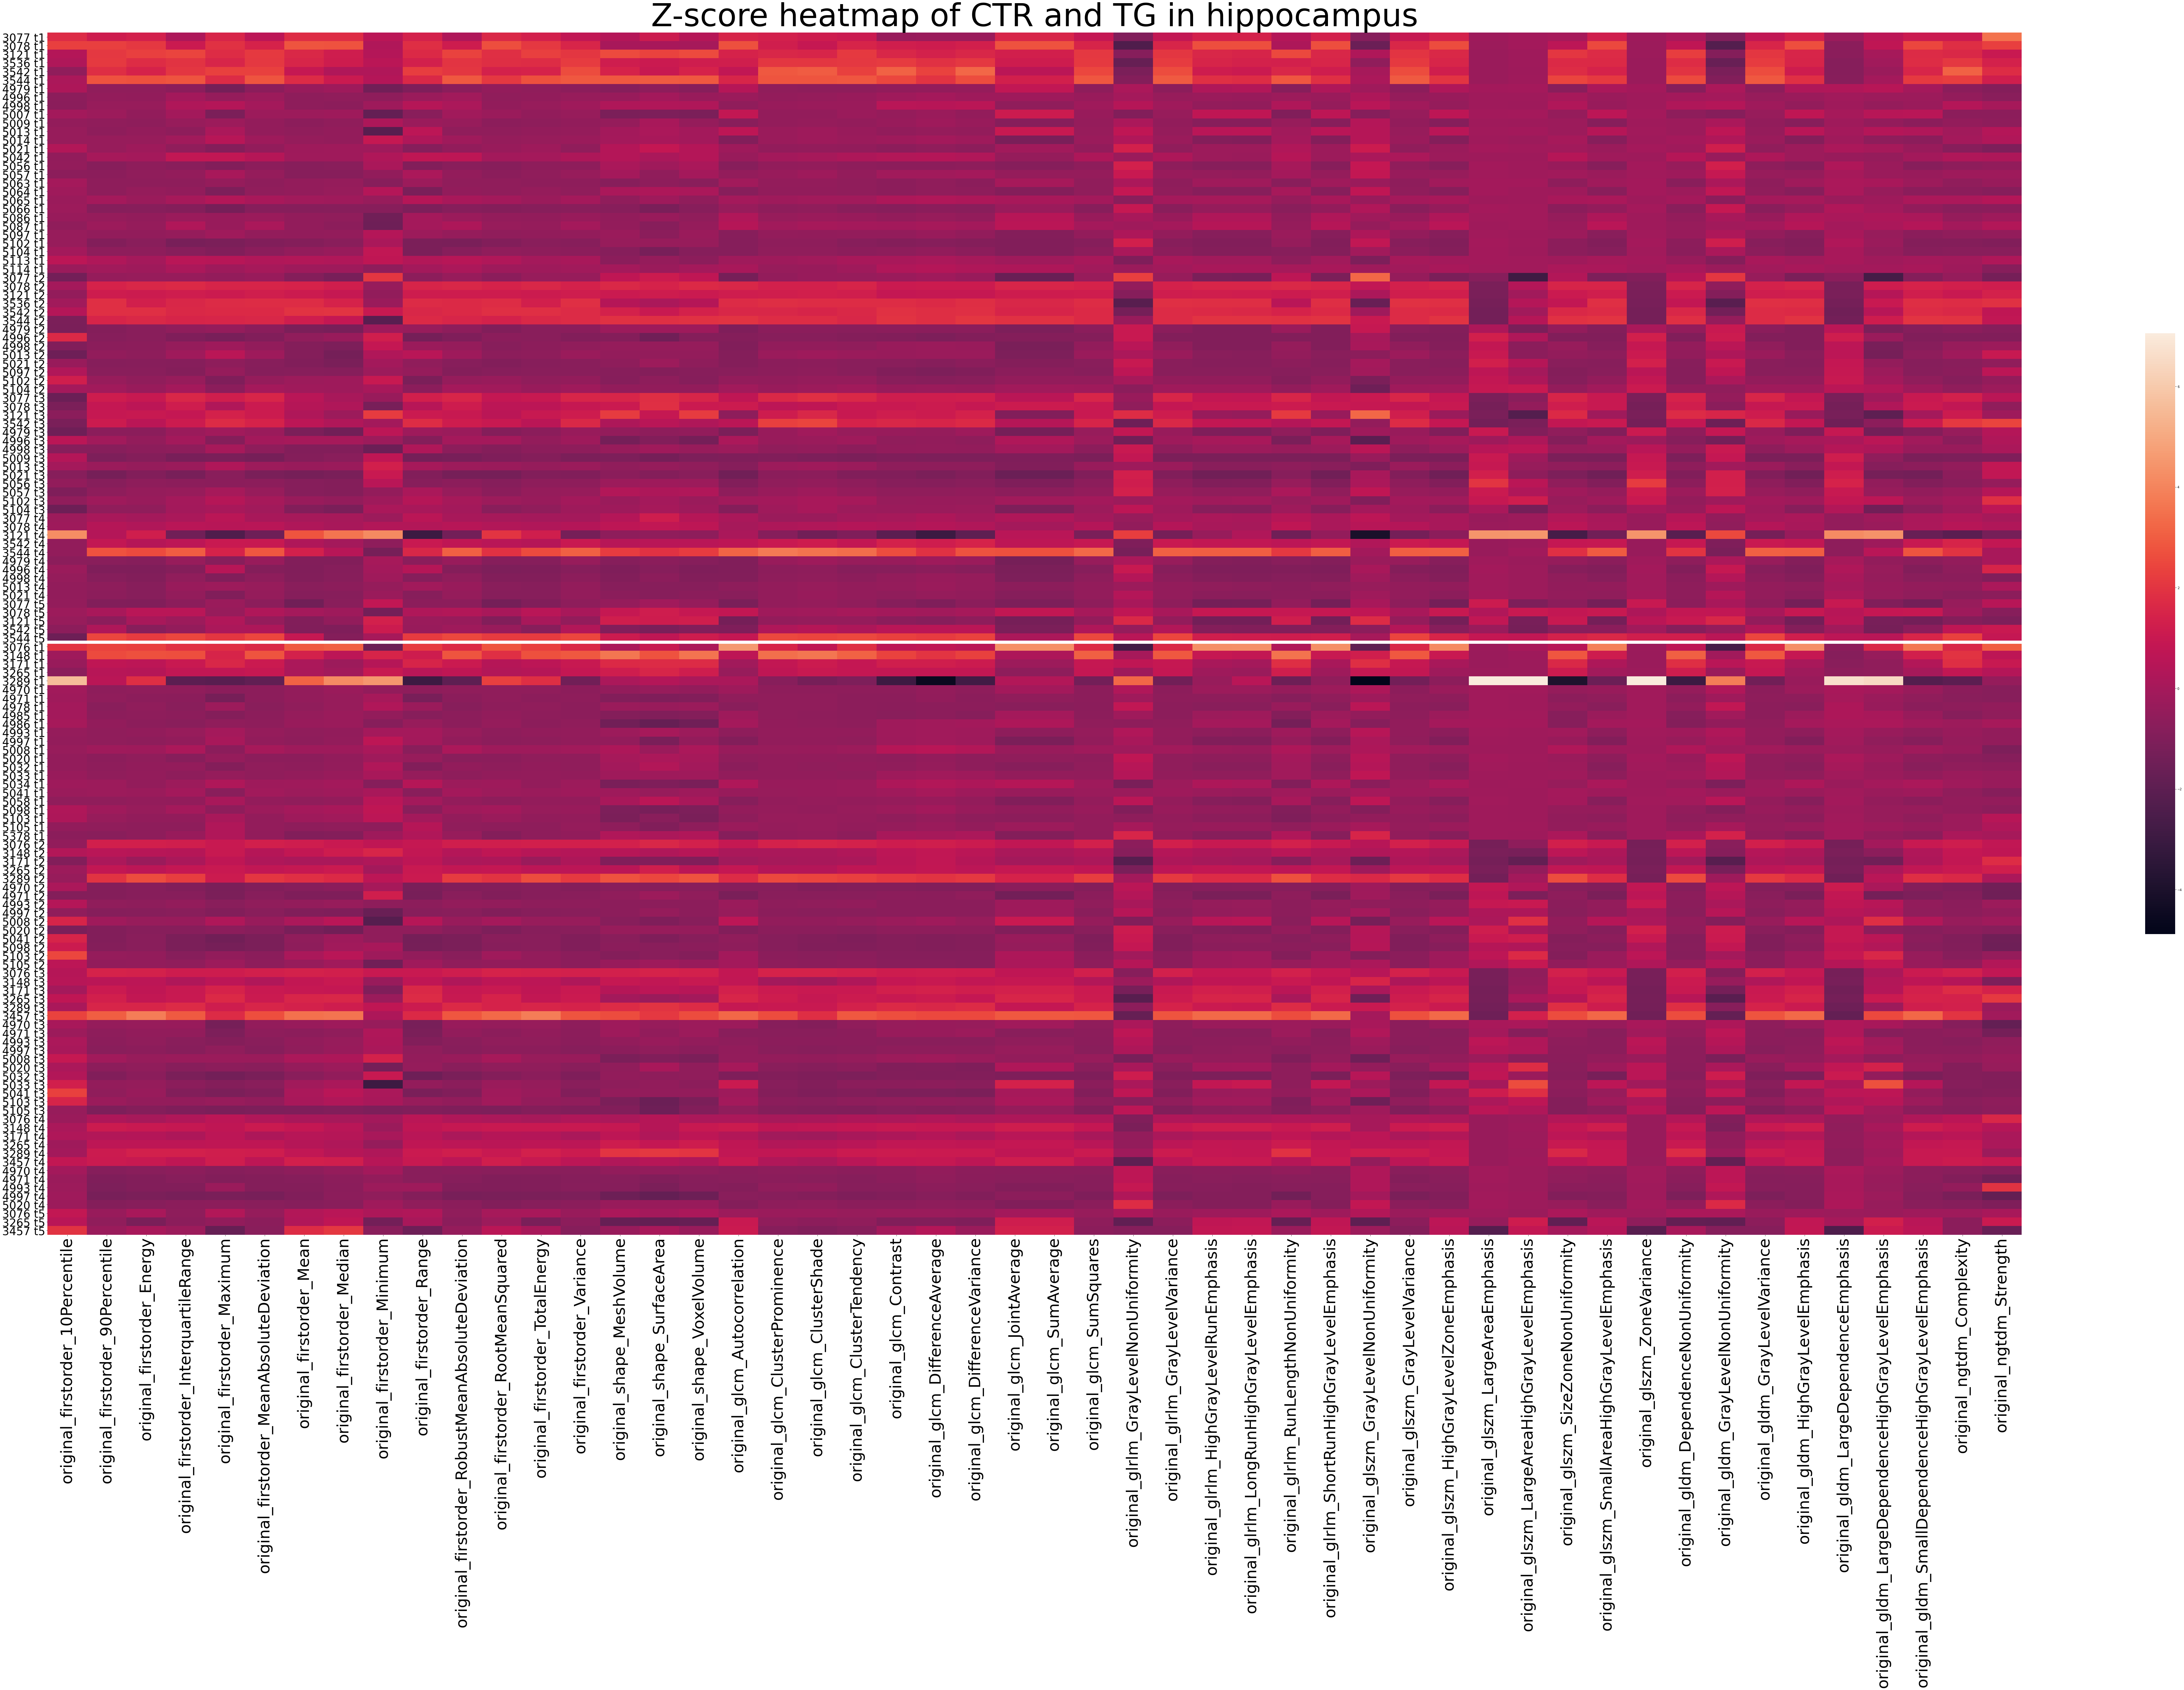

In [19]:
#Here it is plotted the z-score heatmap. 

fig, ax=plt.subplots(figsize=(140,70)) 
segon = sns.heatmap(base_dades_features, annot=False, cbar_kws={"shrink": 0.5})
segon.axhline(71, color='white', lw=10)
segon.set_yticklabels(segon.get_ymajorticklabels(), fontsize = 35) 
segon.set_xticklabels(segon.get_xmajorticklabels(), fontsize = 50)
segon.set_title(titol, fontsize = 100)
fig.savefig(png, dpi=300)